In [1]:
# importing the packages

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [2]:
#importing the stats function

from scipy.stats import hmean, gmean

In [3]:
# importing the dataset from source file

train = pd.read_csv(r'C:\Users\Grade A\Desktop\DSN_AI_BOOTCAMP_QUALIFICATION\train.csv')
test  = pd.read_csv(r'C:\Users\Grade A\Desktop\DSN_AI_BOOTCAMP_QUALIFICATION\test.csv')
SampleSubmission = pd.read_csv(r'C:\Users\Grade A\Desktop\DSN_AI_BOOTCAMP_QUALIFICATION\SampleSubmission.csv')

In [4]:
#checking the train dataset( head() displays the first five rows of the dataset)

train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
#checking the first five rows of the test dataset

test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [6]:
# checking the target varaiable"s value

train['default_status'].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [7]:
# checking the length of the Sample Submission(how the submission will look like)

len(SampleSubmission)

24000

In [8]:
#checking the length[rows & columns] of the train & test dataset

train.shape, test.shape

((56000, 52), (24000, 51))

In [9]:
# checking how the train dataset look like

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [10]:
train['form_field50'].value_counts()

0.000000    19
0.016683     5
0.005561     5
0.006970     5
0.009990     5
            ..
0.466162     1
0.051705     1
0.099353     1
0.058151     1
0.015136     1
Name: form_field50, Length: 44746, dtype: int64

In [11]:
test['form_field50'].value_counts()

0.000000    5
0.006970    4
0.011640    4
0.006970    3
0.020002    3
           ..
0.145521    1
0.239201    1
0.309593    1
0.367784    1
0.143856    1
Name: form_field50, Length: 19154, dtype: int64

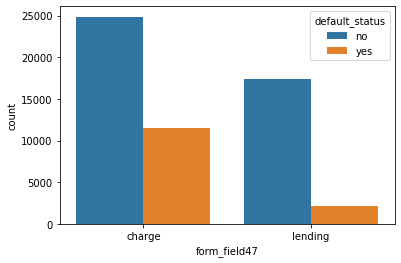

In [12]:
sns.countplot(train['form_field47'], hue='default_status', data=train)

In [13]:
pd.crosstab(train['form_field46'],train['default_status'], normalize=True)

default_status,no,yes
form_field46,,
0.0,0.733415,0.182637
1.0,0.037335,0.036587
2.0,0.003766,0.005063
3.0,0.000499,0.000524
4.0,0.000025,0.000125
5.0,0.000000,0.000025


In [14]:
#checking the float data types
train.dtypes[train.dtypes == 'float64']

form_field1     float64
form_field2     float64
form_field3     float64
form_field4     float64
form_field5     float64
form_field6     float64
form_field7     float64
form_field8     float64
form_field9     float64
form_field10    float64
form_field11    float64
form_field12    float64
form_field13    float64
form_field15    float64
form_field16    float64
form_field17    float64
form_field18    float64
form_field19    float64
form_field20    float64
form_field21    float64
form_field22    float64
form_field23    float64
form_field24    float64
form_field25    float64
form_field26    float64
form_field27    float64
form_field28    float64
form_field29    float64
form_field30    float64
form_field31    float64
form_field32    float64
form_field33    float64
form_field34    float64
form_field35    float64
form_field36    float64
form_field37    float64
form_field38    float64
form_field39    float64
form_field40    float64
form_field41    float64
form_field42    float64
form_field43    

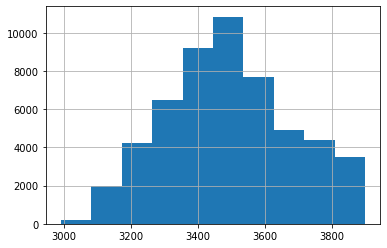

In [16]:
train['form_field1'].hist()

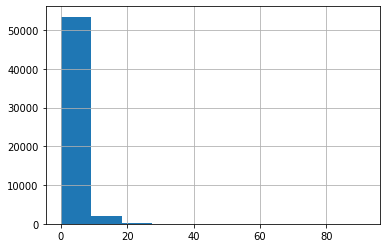

In [17]:
train['form_field4'].hist()

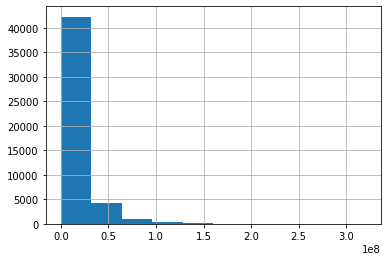

In [18]:
train['form_field9'].hist()

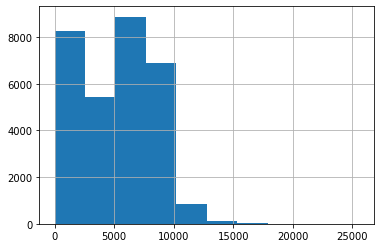

In [19]:
train['form_field30'].hist()

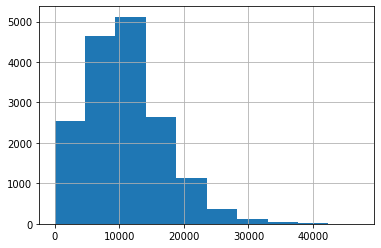

In [20]:
train['form_field31'].hist()

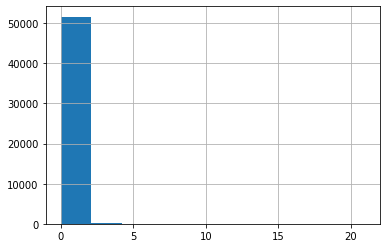

In [21]:
train['form_field39'].hist()

In [22]:
train['form_field2'].value_counts()

0.00000    4453
0.68005     181
0.09505     171
0.19505     153
0.06505     149
           ... 
0.72325       1
0.13495       1
1.76795       1
2.65925       1
0.26065       1
Name: form_field2, Length: 20015, dtype: int64

In [23]:
pd.crosstab(train['form_field5'],train['default_status'], normalize=True) * 100

default_status,no,yes
form_field5,,
0.0000,70.256088,20.177914
0.2412,0.003594,0.005391
0.2484,0.003594,0.000000
0.2556,0.003594,0.000000
0.2628,0.003594,0.000000
...,...,...
238.0500,0.001797,0.000000
248.5404,0.001797,0.000000
312.1902,0.001797,0.000000


In [24]:
# converting the categorical value into numeric value in the train data

train['form_field47'] = train['form_field47'].replace({'charge':1, 'lending':0})
train['default_status'] = train['default_status'].replace({'yes':1, 'no':0})

In [25]:
# converting the categorical value into numeric value in the test data

test['form_field47'] = test['form_field47'].replace({'charge':1, 'lending':0})

In [26]:
# checking how the train dataset looks like

train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,56000.000000,3.511100e+04,55645.000000,4.494400e+04,56000.000000
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,0.368215,6.634511,0.563377,0.072520,0.095371,0.649518,3.052449e+05,1.049061,6.005862e+05,0.244911
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,0.412858,6.378946,0.196973,0.291146,0.335210,0.477125,1.647757e+06,1.806160,5.842405e+06,0.430038
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,0.000000,2.020000,0.411672,0.000000,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02,0.000000
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,0.220000,5.050000,0.588648,0.000000,0.000000,1.000000,3.181243e+02,0.000000,1.703996e-01,0.000000
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,0.628573,10.100000,0.753840,0.000000,0.000000,1.000000,1.153022e+03,1.181754,4.993370e-01,0.000000
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,2.200000,91.910000,0.800000,5.000000,5.000000,1.000000,5.321014e+07,28.000000,2.307571e+08,1.000000


In [27]:
# checking out the missing values in the train dataset

train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [28]:
test['form_field14'].value_counts()

48187375     2133
34694910     2103
16576457     1938
28141427     1780
21973443     1744
             ... 
9672874         1
20328751        1
208169460       1
48910915        1
160753083       1
Name: form_field14, Length: 739, dtype: int64

In [29]:
# filling in the train and test dataset with anything(0,-1,-99,-999). it depends on how the dataset looks like

train.fillna(-999, inplace = True)
test.fillna(-999, inplace = True)

In [30]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,1,-999.000000,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,-999.0,0.0,1,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,1,-999.000000,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,-999.0,0.0,1,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,1,97.887502,1.427891,0.045630,0


In [31]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,1,-999.000000,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,0,-999.000000,0.504974,0.043525
2,Apcnt_1000052,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,...,-999.0000,-999.000000,0.00,-999.000000,-999.0,-999.0,1,-999.000000,0.000000,-999.000000
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,-999.0000,0.916663,2.02,0.464224,-999.0,-999.0,1,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,-999.0000,0.234047,23.23,0.726688,0.0,0.0,0,1303.587148,1.637733,0.163124


In [32]:
# checking the correlation features of the train features

train.corr()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
form_field1,1.000000,0.066395,0.358717,0.359764,0.355599,0.155828,0.123642,0.230769,0.229502,0.172198,...,0.413058,0.381166,0.579925,0.240394,0.281385,-0.090533,0.054497,0.361472,0.040527,-0.140965
form_field2,0.066395,1.000000,0.080174,0.080579,0.080074,-0.138547,-0.032814,-0.090430,-0.026720,-0.027382,...,0.070366,0.080117,0.094005,-0.021014,0.105363,0.097002,-0.002065,0.080659,0.024883,0.073846
form_field3,0.358717,0.080174,1.000000,0.999254,0.993343,0.025861,0.024715,0.038259,0.041953,0.031477,...,0.491087,0.787299,0.241327,0.067352,0.127518,-0.006916,0.010087,0.999499,0.006288,0.009359
form_field4,0.359764,0.080579,0.999254,1.000000,0.991149,0.026420,0.025235,0.039185,0.042613,0.032431,...,0.490614,0.786950,0.242454,0.067842,0.133351,-0.007203,0.010339,0.998938,0.006456,0.009983
form_field5,0.355599,0.080074,0.993343,0.991149,1.000000,0.021725,0.020352,0.032050,0.034483,0.025820,...,0.488447,0.780580,0.232281,0.056543,0.121485,-0.003183,0.008272,0.992554,0.005129,0.015713
form_field6,0.155828,-0.138547,0.025861,0.026420,0.021725,1.000000,0.207660,0.522087,0.289385,0.258334,...,0.018392,0.009114,0.092688,0.179975,-0.005218,-0.139724,0.030454,0.025554,0.067747,-0.173197
form_field7,0.123642,-0.032814,0.024715,0.025235,0.020352,0.207660,1.000000,0.357153,0.293446,0.900846,...,0.045296,0.038585,0.104369,0.235327,0.053012,-0.057427,0.073881,0.025518,0.063251,-0.120380
form_field8,0.230769,-0.090430,0.038259,0.039185,0.032050,0.522087,0.357153,1.000000,0.613040,0.472565,...,0.054251,0.053338,0.162012,0.261659,0.027039,-0.176958,0.131430,0.040402,0.134541,-0.238216
form_field9,0.229502,-0.026720,0.041953,0.042613,0.034483,0.289385,0.293446,0.613040,1.000000,0.497936,...,0.090142,0.091385,0.164731,0.348559,0.093447,-0.176700,0.154381,0.046301,0.224912,-0.228493
form_field10,0.172198,-0.027382,0.031477,0.032431,0.025820,0.258334,0.900846,0.472565,0.497936,1.000000,...,0.066230,0.062939,0.136276,0.319098,0.094964,-0.098030,0.112312,0.033265,0.102562,-0.169563


In [34]:
# creating new features in the train dataset from the given features

train['form_field99'] = train['form_field1'] + train['form_field4']
train['form_field99'] = train['form_field1'] + train['form_field8']
train['form_field99'] = train['form_field1'] + train['form_field6']

In [35]:
# creating new features in the test dataset from the given features

test['form_field99'] = test['form_field1'] + test['form_field4']
test['form_field99'] = test['form_field1'] + test['form_field8']
test['form_field99'] = test['form_field1'] + test['form_field6']

In [36]:
#checking the first five rows of the dataset

train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,form_field99
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,2.02,0.711632,0.0,0.0,1,-999.000000,1.129518,0.044335,0,3436.0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,8.08,0.183584,-999.0,0.0,1,349.805730,1.620483,0.322436,0,3456.0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,...,18.18,0.791136,0.0,0.0,1,-999.000000,1.513370,0.011640,1,2277.0
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,2.02,0.685168,-999.0,0.0,1,89.940100,0.664452,0.082729,0,195538.0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,12.12,0.438168,0.0,0.0,1,97.887502,1.427891,0.045630,0,4926.0


In [37]:
# creating new features in the train dataset from the given features & test dataset

train['form_field54'] = train['form_field4'].round(1)
test['form_field54'] = test['form_field4'].round(1)

In [39]:
test['form_field54'].value_counts()

 0.0      20575
 13.8       269
 0.4        154
 0.5        147
-999.0      146
          ...  
 27.3         1
 33.0         1
 25.0         1
 28.2         1
 23.7         1
Name: form_field54, Length: 255, dtype: int64

In [40]:
# more advance feature

def form(x):
    if x == -1.0:
        return 1
    elif x ==0.0 :
        return 2
    elif x == 0.4:
        return 3
    elif x == 0.5:
        return 4
    elif x == 13.8:
        return 5
    elif x == 21.8:
        return 6
    elif x == 24.5:
        return 7
    elif x == 24.7:
        return 8
    elif x == 26.1:
        return 9
    elif x == 27.3:
        return 10
    else:
        return 12

In [41]:
train['form'] = train['form_field54'].apply(form)
test['form'] = test['form_field54'].apply(form)

In [42]:
train.corr()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,form_field99,form_field54,form
form_field1,1.000000,0.066395,0.358717,0.359764,0.355599,0.155828,0.123642,0.230769,0.229502,0.172198,...,0.240394,0.281385,-0.090533,0.054497,0.361472,0.040527,-0.140965,0.156553,0.359763,-0.077675
form_field2,0.066395,1.000000,0.080174,0.080579,0.080074,-0.138547,-0.032814,-0.090430,-0.026720,-0.027382,...,-0.021014,0.105363,0.097002,-0.002065,0.080659,0.024883,0.073846,-0.138481,0.080579,0.044263
form_field3,0.358717,0.080174,1.000000,0.999254,0.993343,0.025861,0.024715,0.038259,0.041953,0.031477,...,0.067352,0.127518,-0.006916,0.010087,0.999499,0.006288,0.009359,0.026124,0.999253,-0.206782
form_field4,0.359764,0.080579,0.999254,1.000000,0.991149,0.026420,0.025235,0.039185,0.042613,0.032431,...,0.067842,0.133351,-0.007203,0.010339,0.998938,0.006456,0.009983,0.026684,1.000000,-0.190303
form_field5,0.355599,0.080074,0.993343,0.991149,1.000000,0.021725,0.020352,0.032050,0.034483,0.025820,...,0.056543,0.121485,-0.003183,0.008272,0.992554,0.005129,0.015713,0.021987,0.991148,-0.203118
form_field6,0.155828,-0.138547,0.025861,0.026420,0.021725,1.000000,0.207660,0.522087,0.289385,0.258334,...,0.179975,-0.005218,-0.139724,0.030454,0.025554,0.067747,-0.173197,1.000000,0.026420,-0.112446
form_field7,0.123642,-0.032814,0.024715,0.025235,0.020352,0.207660,1.000000,0.357153,0.293446,0.900846,...,0.235327,0.053012,-0.057427,0.073881,0.025518,0.063251,-0.120380,0.207728,0.025235,-0.045518
form_field8,0.230769,-0.090430,0.038259,0.039185,0.032050,0.522087,0.357153,1.000000,0.613040,0.472565,...,0.261659,0.027039,-0.176958,0.131430,0.040402,0.134541,-0.238216,0.522198,0.039185,-0.164008
form_field9,0.229502,-0.026720,0.041953,0.042613,0.034483,0.289385,0.293446,0.613040,1.000000,0.497936,...,0.348559,0.093447,-0.176700,0.154381,0.046301,0.224912,-0.228493,0.289522,0.042612,-0.152402
form_field10,0.172198,-0.027382,0.031477,0.032431,0.025820,0.258334,0.900846,0.472565,0.497936,1.000000,...,0.319098,0.094964,-0.098030,0.112312,0.033265,0.102562,-0.169563,0.258432,0.032430,-0.076626


In [43]:
#saving the new created train & test features

train.to_csv('credit1_train.csv', index=False)
test.to_csv('credit1_test.csv', index=False)

In [44]:
#checking out the missing values

train.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
